In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # for splitting train and test
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier algorithm
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

df = pd.read_csv('creditcard.csv')
fair_transactions = len(df[df['Class']==0])
fraud_transactions = len(df[df['Class']==1])
fraud_percent = fraud_transactions*100/(fair_transactions+fraud_transactions)
print("No.of fair transactions = {}".format(fair_transactions))
print("No.of fraud transactions = {}".format(fraud_transactions))
print("Fraud transactions percentage = {}".format(fraud_percent))


df_fair = df[df['Class']==0]
df_fraud = df[df['Class']==1]

No.of fair transactions = 284315
No.of fraud transactions = 492
Fraud transactions percentage = 0.1727485630620034


In [3]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [4]:
# SVM CLASSIFIER

comp = {}
comp_f1 = {}

svm = SVC()
svm.fit(X_train, y_train)
svm_result = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test,svm_result)
f1_score_svm = f1_score(y_test,svm_result,average='macro')
comp['SVM']=accuracy_svm
comp_f1['SVM'] = f1_score_svm
print("SVC accuracy score: {}".format(accuracy_svm))
print("SVC f1 score: {}".format(f1_score_svm))

SVC accuracy score: 0.9982795547909132
SVC f1 score: 0.4995695183877146


Decision tree classifier accuracy score (depth=1): 0.9990402958697612
F1 score of decision classifier accuracy (depth=1): 0.7071428571428572
Decision tree classifier accuracy score (depth=2): 0.9992626663389628
F1 score of decision classifier accuracy (depth=2): 0.770909090909091
Decision tree classifier accuracy score (depth=3): 0.9992743700478681
F1 score of decision classifier accuracy (depth=3): 0.7769784172661872
Decision tree classifier accuracy score (depth=4): 0.9994733330992591
F1 score of decision classifier accuracy (depth=4): 0.8363636363636363
Decision tree classifier accuracy score (depth=5): 0.9994616293903538
F1 score of decision classifier accuracy (depth=5): 0.8345323741007193
Decision tree classifier accuracy score (depth=6): 0.9994265182636377
F1 score of decision classifier accuracy (depth=6): 0.8218181818181819
Decision tree classifier accuracy score (depth=7): 0.9994733330992591
F1 score of decision classifier accuracy (depth=7): 0.8314606741573034
Decision tree 

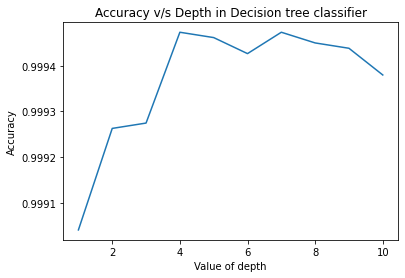

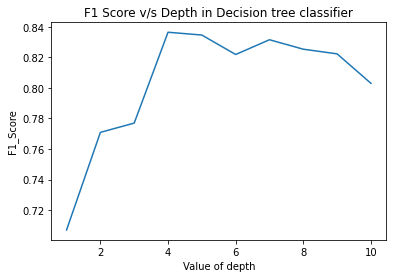

In [5]:
# DECISION TREE 

d_tree={}
f1_tree={}
for i in range(1,11):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    tree_result = tree.predict(X_test)
    accuracy_tree = accuracy_score(y_test, tree_result)
    f1_score_tree = f1_score(y_test, tree_result)
    f1_tree[i] = f1_score_tree
    d_tree[i] = accuracy_tree
    print("Decision tree classifier accuracy score (depth={}): {}".format(i,accuracy_tree))
    print("F1 score of decision classifier accuracy (depth={}): {}".format(i,f1_score_tree))


comp['DECISION TREE']=max(d_tree.values())
comp_f1['DECISION TREE']=max(f1_tree.values())


plt.plot(d_tree.keys(), d_tree.values())
plt.title("Accuracy v/s Depth in Decision tree classifier")
plt.ylabel("Accuracy")
plt.xlabel("Value of depth")
plt.show()

plt.plot(f1_tree.keys(), f1_tree.values())
plt.title("F1 Score v/s Depth in Decision tree classifier")
plt.ylabel("F1_Score")
plt.xlabel("Value of depth")
plt.show()

Random Forest Classifier accuracy score (depth=1): 0.9987008883115059
Random Forest Classifier f1 score (depth=1): 0.44221105527638194
Random Forest Classifier accuracy score (depth=2): 0.9990637032875719
Random Forest Classifier f1 score (depth=2): 0.6666666666666667
Random Forest Classifier accuracy score (depth=3): 0.9991456292499094
Random Forest Classifier f1 score (depth=3): 0.7044534412955464
Random Forest Classifier accuracy score (depth=4): 0.9993679997191109
Random Forest Classifier f1 score (depth=4): 0.7906976744186046
Random Forest Classifier accuracy score (depth=5): 0.9994148145547324
Random Forest Classifier f1 score (depth=5): 0.8091603053435116
Random Forest Classifier accuracy score (depth=6): 0.9994265182636377
Random Forest Classifier f1 score (depth=6): 0.8093385214007782
Random Forest Classifier accuracy score (depth=7): 0.9994382219725431
Random Forest Classifier f1 score (depth=7): 0.813953488372093
Random Forest Classifier accuracy score (depth=8): 0.999496740

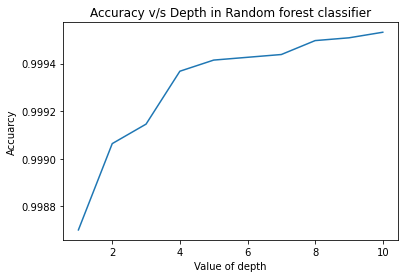

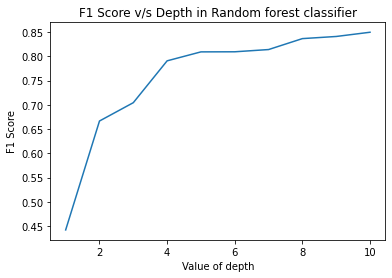

In [6]:
# RANDOM FOREST CLASSIFIER

d_rfc = {}
f1_rfc={}

for i in range(1,11):
    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(X_train, y_train)
    rfc_result = rfc.predict(X_test)
    accuracy_rfc = accuracy_score(y_test, rfc_result)
    d_rfc[i] = accuracy_rfc
    f1_score_rfc=f1_score(y_test,rfc_result)
    f1_rfc[i] = f1_score_rfc
    print("Random Forest Classifier accuracy score (depth={}): {}".format(i,accuracy_rfc))
    print("Random Forest Classifier f1 score (depth={}): {}".format(i,f1_score_rfc))

comp['RANDOM FOREST']=max(d_rfc.values())
comp_f1['RANDOM FOREST']=max(f1_rfc.values())

plt.plot(d_rfc.keys(), d_rfc.values())
plt.title("Accuracy v/s Depth in Random forest classifier")
plt.xlabel("Value of depth")
plt.ylabel("Accuarcy")
plt.show()

plt.plot(f1_rfc.keys(), f1_rfc.values())
plt.title("F1 Score v/s Depth in Random forest classifier")
plt.xlabel("Value of depth")
plt.ylabel("F1 Score")
plt.show()

KNN Classifier accuracy score (k=1): 0.9980805917395222
KNN Classifier f1 score (k=1): 0.19607843137254902
KNN Classifier accuracy score (k=2): 0.9983614807532507
KNN Classifier f1 score (k=2): 0.11392405063291139
KNN Classifier accuracy score (k=3): 0.9983263696265346
KNN Classifier f1 score (k=3): 0.11180124223602485
KNN Classifier accuracy score (k=4): 0.9983497770443454
KNN Classifier f1 score (k=4): 0.07843137254901959
KNN Classifier accuracy score (k=5): 0.99833807333544
KNN Classifier f1 score (k=5): 0.0779220779220779
KNN Classifier accuracy score (k=6): 0.9983263696265346
KNN Classifier f1 score (k=6): 0.05298013245033112
KNN Classifier accuracy score (k=7): 0.9983146659176293
KNN Classifier f1 score (k=7): 0.05263157894736842
KNN Classifier accuracy score (k=8): 0.9982912584998186
KNN Classifier f1 score (k=8): 0.02666666666666666
KNN Classifier accuracy score (k=9): 0.9982912584998186
KNN Classifier f1 score (k=9): 0.02666666666666666
KNN Classifier accuracy score (k=10): 0.

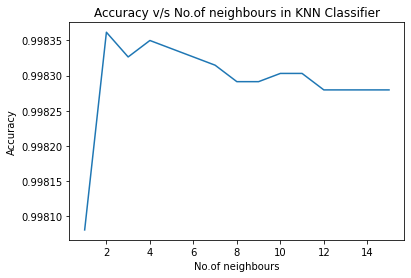

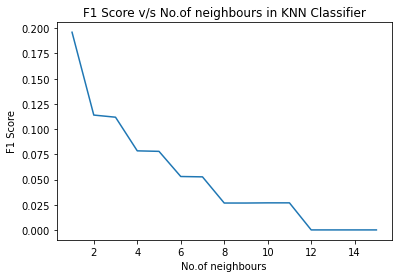

In [7]:
# KNN NEIGHBOUR CLASSIFIER

f1_knn={}
d_knn={}

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')
    knn.fit(X_train, y_train)
    knn_result = knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, knn_result)
    d_knn[i] = accuracy_knn
    f1_score_knn = f1_score(y_test, knn_result)
    f1_knn[i] = f1_score_knn
    print("KNN Classifier accuracy score (k={}): {}".format(i,accuracy_knn))
    print("KNN Classifier f1 score (k={}): {}".format(i,f1_score_knn))

comp['KNN']=max(d_knn.values())
comp_f1['KNN']=max(f1_knn.values())

plt.plot(d_knn.keys(), d_knn.values())
plt.title("Accuracy v/s No.of neighbours in KNN Classifier")
plt.xlabel("No.of neighbours")
plt.ylabel("Accuracy")
plt.show()

plt.plot(f1_knn.keys(), f1_knn.values())
plt.title("F1 Score v/s No.of neighbours in KNN Classifier")
plt.xlabel("No.of neighbours")
plt.ylabel("F1 Score")
plt.show()

{'SVM': 0.9982795547909132, 'DECISION TREE': 0.9994733330992591, 'RANDOM FOREST': 0.9995318516437859, 'KNN': 0.9983614807532507}


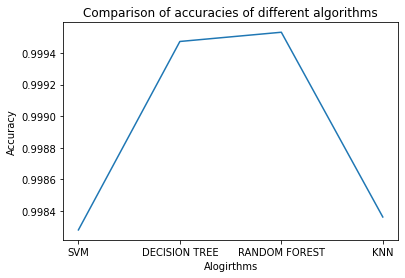

In [8]:
print(comp)
plt.plot(comp.keys(),comp.values())
plt.title("Comparison of accuracies of different algorithms")
plt.xlabel("Alogirthms")
plt.ylabel("Accuracy")
plt.show()

{'SVM': 0.4995695183877146, 'DECISION TREE': 0.8363636363636363, 'RANDOM FOREST': 0.849624060150376, 'KNN': 0.19607843137254902}


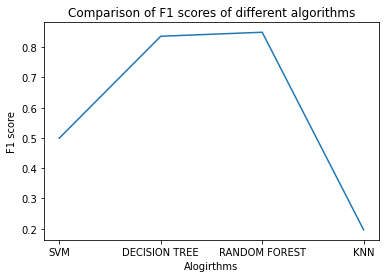

In [9]:
print(comp_f1)
plt.plot(comp_f1.keys(),comp_f1.values())
plt.title("Comparison of F1 scores of different algorithms")
plt.xlabel("Alogirthms")
plt.ylabel("F1 score")
plt.show()